## Importing Libraries

In [6]:
import pandas as pd
import math
import os
import numpy as np
import sklearn.metrics as metrics
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Loading Datasets

In [2]:
df = pd.read_csv("tennis.csv")
print(df)

     outlook temperature humidity    wind playtennis
0      sunny         hot     high    weak         no
1      sunny         hot     high  strong         no
2   overcast         hot     high    weak        yes
3       rain        mild     high    weak        yes
4       rain        cool   normal    weak        yes
5       rain        cool   normal  strong         no
6   overcast        cool   normal  strong        yes
7      sunny        mild     high    weak         no
8      sunny        cool   normal    weak        yes
9       rain        mild   normal    weak        yes
10     sunny        mild   normal  strong        yes
11  overcast        mild     high  strong        yes
12  overcast         hot   normal    weak        yes
13      rain        mild     high  strong         no


## Converting categorical variables into dummies/indicator variables

In [3]:
df_getdummy=pd.get_dummies(data=df, columns=['outlook', 'temperature','humidity','wind'])
df_getdummy

,playtennis,outlook_overcast,outlook_rain,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,wind_strong,wind_weak
0,no,0,0,1,0,1,0,1,0,0,1
1,no,0,0,1,0,1,0,1,0,1,0
2,yes,1,0,0,0,1,0,1,0,0,1
3,yes,0,1,0,0,0,1,1,0,0,1
4,yes,0,1,0,1,0,0,0,1,0,1
5,no,0,1,0,1,0,0,0,1,1,0
6,yes,1,0,0,1,0,0,0,1,1,0
7,no,0,0,1,0,0,1,1,0,0,1
8,yes,0,0,1,1,0,0,0,1,0,1
9,yes,0,1,0,0,0,1,0,1,0,1


## Separating the training data and test data

In [20]:
from sklearn.model_selection import train_test_split

X = df_getdummy.drop('playtennis',axis=1)
y = df_getdummy['playtennis']
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Importing Decision Tree Classifier via sklearn

In [21]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dectree.fit(X_train,y_train)
Y_pred = dectree.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, Y_pred))

Accuracy:  0.75


## Visualising the decision tree diagram

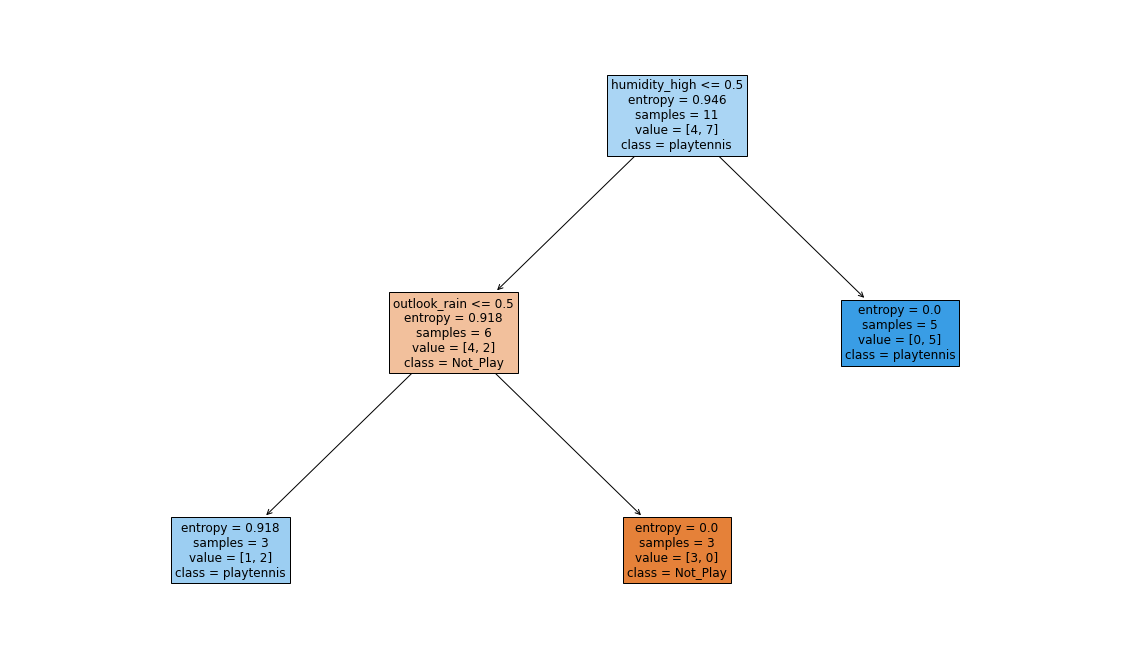

In [9]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))
figTree = plot_tree(dectree, feature_names=df_getdummy.columns, fontsize=12, filled=True, class_names=['Not_Play', 'playtennis'])